In [39]:
# ==============================================
# 🧮 MACHINE LEARNING: NAIVE BAYES CLASSIFICATION
# Dataset: hasil_dataset_final.xlsx
# Model: Categorical Naive Bayes
# Author: Surya Dwi Satria
# ==============================================

# 1️⃣ Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
import joblib



In [40]:
# 2️⃣ Load Dataset
df = pd.read_excel("StudentPerformanceFactors.xlsx")
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (6000, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [41]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

kolom_kategori = {
    'Hours_Studied': ([0, 10, 20, 30], ['Low', 'Medium', 'High']),
    'Attendance': ([0, 74, 100], ['Not Met', 'Met']),
    'Sleep_Hours': ([0, 4, 6, 8, 10], ['Low', 'Medium', 'High', 'Extreme']),
    'Previous_Scores': ([0, 40, 66.5,100], ['Low', 'Medium', 'High']),
    'Tutoring_Sessions': ([0, 2, 4, 6, 8], ['Low', 'Medium', 'High', 'Extreme']),
    'Physical_Activity': ([0, 2, 4, 6], ['Low', 'Medium', 'High']),
    'Exam_Score': ([0, 40, 66.5,100], ['Low', 'Medium', 'High']),
}


In [42]:
for col in num_cols:
    if col in kolom_kategori:
        bins, labels = kolom_kategori[col]
        df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    else:
        # Jika kolom numerik tidak ada di mapping, biarkan nilainya seperti semula
        df[col] = df[col]

# Pastikan urutan kolom tidak berubah
df = df[df.columns]


In [43]:
# 🔧 1️⃣ Paksa ubah semua kolom ke string secara eksplisit
df = df.astype(str)

# 🔧 2️⃣ Bersihkan seluruh karakter whitespace dan simbol tak terlihat
df = df.applymap(
    lambda x: re.sub(r'[\s\u200b\u200c\u200d\ufeff\xa0]+', '', x)
)

# 🔧 3️⃣ Ganti string kosong atau nilai pseudo-null menjadi NaN
df = df.replace(['', ' ', 'nan', 'NaN', 'None', 'NULL'], np.nan)

# 🔧 4️⃣ Cek ulang nilai kosong
na_count = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean() * 100).sort_values(ascending=False)

print("Jumlah NA per kolom:\n", na_count)
print("\nPersentase NA per kolom (%):\n", na_pct)
df[df.isna().any(axis=1)]


Jumlah NA per kolom:
 Hours_Studied                 233
Exam_Score                      1
Parental_Involvement            0
Attendance                      0
Access_to_Resources             0
Extracurricular_Activities      0
Previous_Scores                 0
Sleep_Hours                     0
Internet_Access                 0
Tutoring_Sessions               0
Family_Income                   0
Motivation_Level                0
Teacher_Quality                 0
School_Type                     0
Physical_Activity               0
Peer_Influence                  0
Learning_Disabilities           0
Parental_Education_Level        0
Distance_from_Home              0
Gender                          0
dtype: int64

Persentase NA per kolom (%):
 Hours_Studied                 3.883333
Exam_Score                    0.016667
Parental_Involvement          0.000000
Attendance                    0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Previous_Scores     

C:\Users\surya\AppData\Local\Temp\ipykernel_25596\3414399513.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
31,NaN,NotMet,Medium,High,Yes,High,Medium,Medium,Yes,Low,High,Medium,Public,Negative,Medium,No,College,Near,Male,High
106,NaN,Met,Medium,Medium,No,High,Medium,Medium,Yes,Low,High,High,Public,Positive,High,No,Postgraduate,Moderate,Male,High
113,NaN,Met,High,High,Yes,High,High,Low,Yes,Low,Medium,High,Private,Neutral,Low,No,Postgraduate,Near,Female,High
125,NaN,NotMet,Medium,Medium,Yes,Medium,High,Low,Yes,Low,Low,High,Public,Neutral,Medium,No,College,Near,Male,High
156,NaN,Met,Medium,Medium,Yes,Low,High,Medium,Yes,Low,Medium,High,Public,Positive,Medium,Yes,HighSchool,Far,Male,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,NaN,Met,Low,Medium,No,Medium,High,Medium,Yes,Low,Low,Low,Public,Negative,Medium,No,Postgraduate,Near,Female,High
5939,NaN,NotMet,Medium,Medium,No,High,High,Medium,Yes,Low,Medium,Low,Public,Neutral,Medium,No,HighSchool,Near,Male,High
5959,NaN,Met,Low,High,No,Medium,High,Low,Yes,Low,High,Medium,Public,Positive,Low,No,College,Moderate,Female,High
5961,NaN,Met,Low,Low,No,High,High,Medium,Yes,Low,Low,High,Public,Positive,Medium,No,HighSchool,Near,Male,High


In [44]:
# 🔧 5️⃣ Pastikan semua kolom sudah string
print("\nTipe data tiap kolom:\n", df.dtypes)


Tipe data tiap kolom:
 Hours_Studied                 object
Attendance                    object
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                   object
Previous_Scores               object
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions             object
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity             object
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                    object
dtype: object


In [45]:
# 3️⃣ Pisahkan Fitur dan Target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [46]:
# 4️⃣ Encode Semua Kolom Jadi Numerik (karena Naive Bayes butuh angka kategori)
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col].astype(str))

y = le.fit_transform(y.astype(str))

print("\nCek tipe data setelah encoding:")
print(X.dtypes)
print("\nJumlah kelas target:", len(set(y)))


Cek tipe data setelah encoding:
Hours_Studied                 int64
Attendance                    int64
Parental_Involvement          int64
Access_to_Resources           int64
Extracurricular_Activities    int64
Sleep_Hours                   int64
Previous_Scores               int64
Motivation_Level              int64
Internet_Access               int64
Tutoring_Sessions             int64
Family_Income                 int64
Teacher_Quality               int64
School_Type                   int64
Peer_Influence                int64
Physical_Activity             int64
Learning_Disabilities         int64
Parental_Education_Level      int64
Distance_from_Home            int64
Gender                        int64
dtype: object

Jumlah kelas target: 3


In [47]:
# Hapus kelas yang punya < 2 sampel (tidak bisa di-stratify)
counts = pd.Series(y).value_counts()
valid_classes = counts[counts > 1].index
mask = pd.Series(y).isin(valid_classes)

X = X[mask]
y = y[mask]


In [48]:
# 5️⃣ Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
# # Misal X dan y sudah kamu siapkan
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X, y)

# print("Distribusi sesudah balancing:")
# print(pd.Series(y_res).value_counts())

In [54]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
import numpy as np
import joblib

# =========================
# 1️⃣ Siapkan Encoder Aman
# =========================
class SafeOrdinalEncoder(OrdinalEncoder):
    """OrdinalEncoder yang otomatis ubah -1 menjadi max(category)+1"""
    def transform(self, X):
        X_enc = super().transform(X)
        # ubah -1 (kategori baru) jadi max+1 dari kolom masing-masing
        for i in range(X_enc.shape[1]):
            mask = X_enc[:, i] < 0
            if np.any(mask):
                max_val = np.nanmax(X_enc[:, i][~mask]) if np.any(~mask) else 0
                X_enc[:, i][mask] = max_val + 1
        return X_enc

encoder = SafeOrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# =========================
# 2️⃣ Buat Pipeline
# =========================
model = Pipeline([
    ('encoder', encoder),
    ('nb', CategoricalNB())
])

# =========================
# 3️⃣ Latih Model
# =========================
model.fit(X_train, y_train)

# =========================
# 4️⃣ Simpan
# =========================
joblib.dump(model, "naive_bayes_balanced_model.pkl")
print("✅ Model aman disimpan dan siap digunakan di Streamlit.")


✅ Model aman disimpan dan siap digunakan di Streamlit.


In [58]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       675
           1       0.85      0.77      0.81       525

    accuracy                           0.84      1200
   macro avg       0.84      0.83      0.83      1200
weighted avg       0.84      0.84      0.84      1200



In [56]:
from sklearn.metrics import balanced_accuracy_score, f1_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))


Balanced Accuracy: 0.831005291005291
Macro F1 Score: 0.8344284457077575


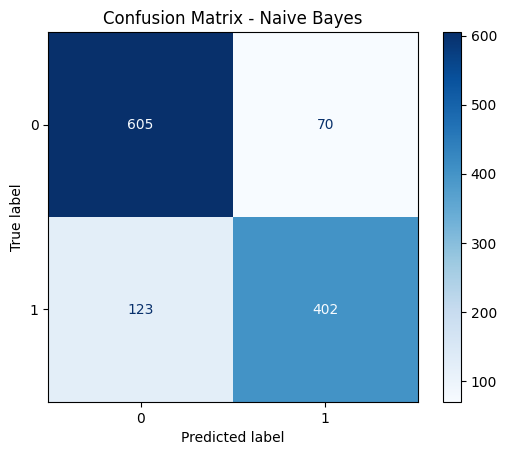

In [55]:

# 9️⃣ Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               5767 non-null   object
 1   Attendance                  6000 non-null   object
 2   Parental_Involvement        6000 non-null   object
 3   Access_to_Resources         6000 non-null   object
 4   Extracurricular_Activities  6000 non-null   object
 5   Sleep_Hours                 6000 non-null   object
 6   Previous_Scores             6000 non-null   object
 7   Motivation_Level            6000 non-null   object
 8   Internet_Access             6000 non-null   object
 9   Tutoring_Sessions           6000 non-null   object
 10  Family_Income               6000 non-null   object
 11  Teacher_Quality             6000 non-null   object
 12  School_Type                 6000 non-null   object
 13  Peer_Influence              6000 non-null   obje

In [53]:
df.to_excel("dataset_final.xlsx", index=False)